<a href="https://colab.research.google.com/github/sjosephnyc1987/public_ipython_Notebooks/blob/main/Gazelle_Glider_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#read an executive summary of this notebook here
# https://sites.google.com/view/sjdataportfolio/data-projects/campaign-analysis-gazelle-glider


#initializations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

#this is a terrible practice and dont do it
import warnings
warnings.filterwarnings("ignore")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
df2 = pd.read_csv("/content/drive/MyDrive/TEMPO/datasets/GazelleGlider_mod1.csv")

#separating the categorical and continueous variables
categorical = ['Station Name', 'Daypart Name' , 'Rotation','BC Day']
continuous = {'pink':'Spend','blue':'CALL','black':'ORDR','orange':'OnlineVisits'}

#create the dataframe that will hold the results of the regression analysis
columns_names = ['predictor','target','F-value','df-model','df-residual','f-critical','model p-value',
                 'r-squared','y-intercept','x-coeff','p-val y-intercept','p-val x-intercept', 'Model Standard Error']
regression_results = pd.DataFrame(columns=columns_names)

#dataframe that holds valid p-value, r-squared, std error etc for categorical & continuous variables
catg_var_reg_results =  pd.DataFrame(columns=['F-test','Model p-val','r-squared','std error'])
conti_var_reg_results =  pd.DataFrame(columns=['F-test','Model p-val','Coefficent','r-squared','std error'])





--------------  Station Name  --------------

-----checking the  Station Name  dummy variable --------
                            0     1     2     3     4     5     6     7     \
Station Name_A&E               0     0     0     0     0     0     0     0   
Station Name_BET               0     0     0     0     0     0     0     0   
Station Name_BET SOUL          0     0     0     0     0     0     0     0   
Station Name_Buzzr Network     0     0     0     0     0     0     0     0   
Station Name_CNN National      0     0     0     0     0     0     0     0   

                            8     9     ...  3378  3379  3380  3381  3382  \
Station Name_A&E               0     0  ...     0     0     0     0     0   
Station Name_BET               0     0  ...     0     0     0     0     0   
Station Name_BET SOUL          0     0  ...     0     0     0     0     0   
Station Name_Buzzr Network     0     0  ...     0     0     0     0     0   
Station Name_CNN National      0     0  

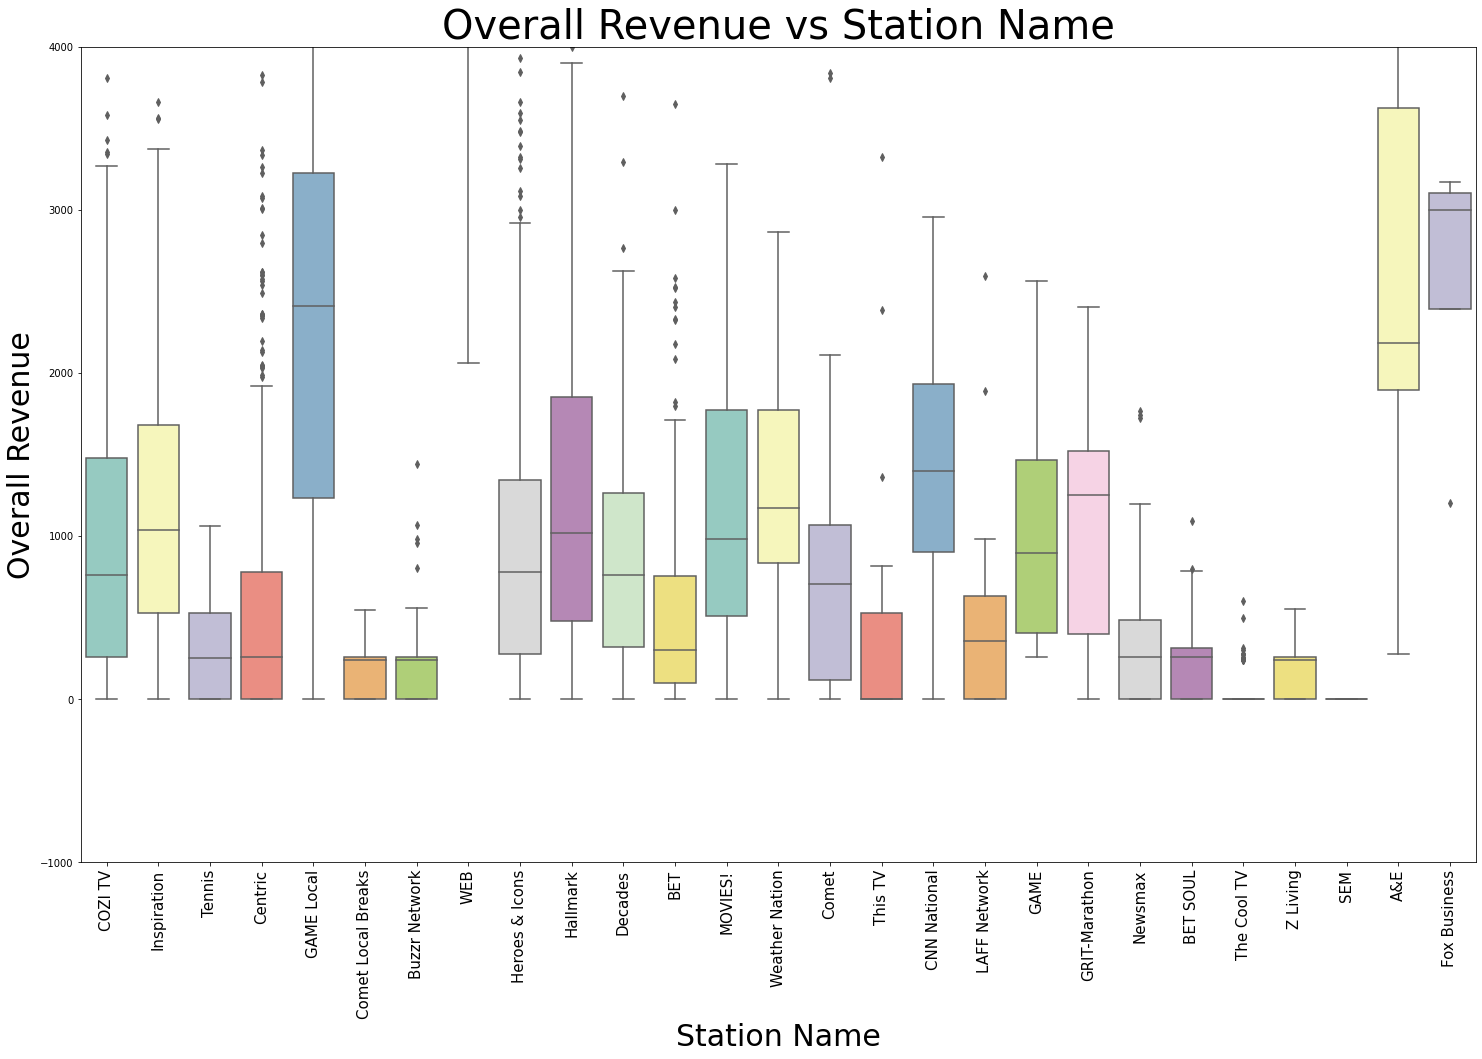




--------------  Daypart Name  --------------

-----checking the  Daypart Name  dummy variable --------
                                        0     1     2     3     4     5     \
Daypart Name_Bonus                         0     0     0     0     0     0   
Daypart Name_Daytime                       0     0     0     0     0     0   
Daypart Name_Early Fringe                  0     0     0     0     0     0   
Daypart Name_Early Morning                 1     1     1     0     1     1   
Daypart Name_Late Fringe                   0     0     0     0     0     0   

                                        6     7     8     9     ...  3378  \
Daypart Name_Bonus                         0     0     0     0  ...     0   
Daypart Name_Daytime                       0     0     0     0  ...     0   
Daypart Name_Early Fringe                  0     0     0     0  ...     0   
Daypart Name_Early Morning                 1     1     1     1  ...     1   
Daypart Name_Late Fringe                

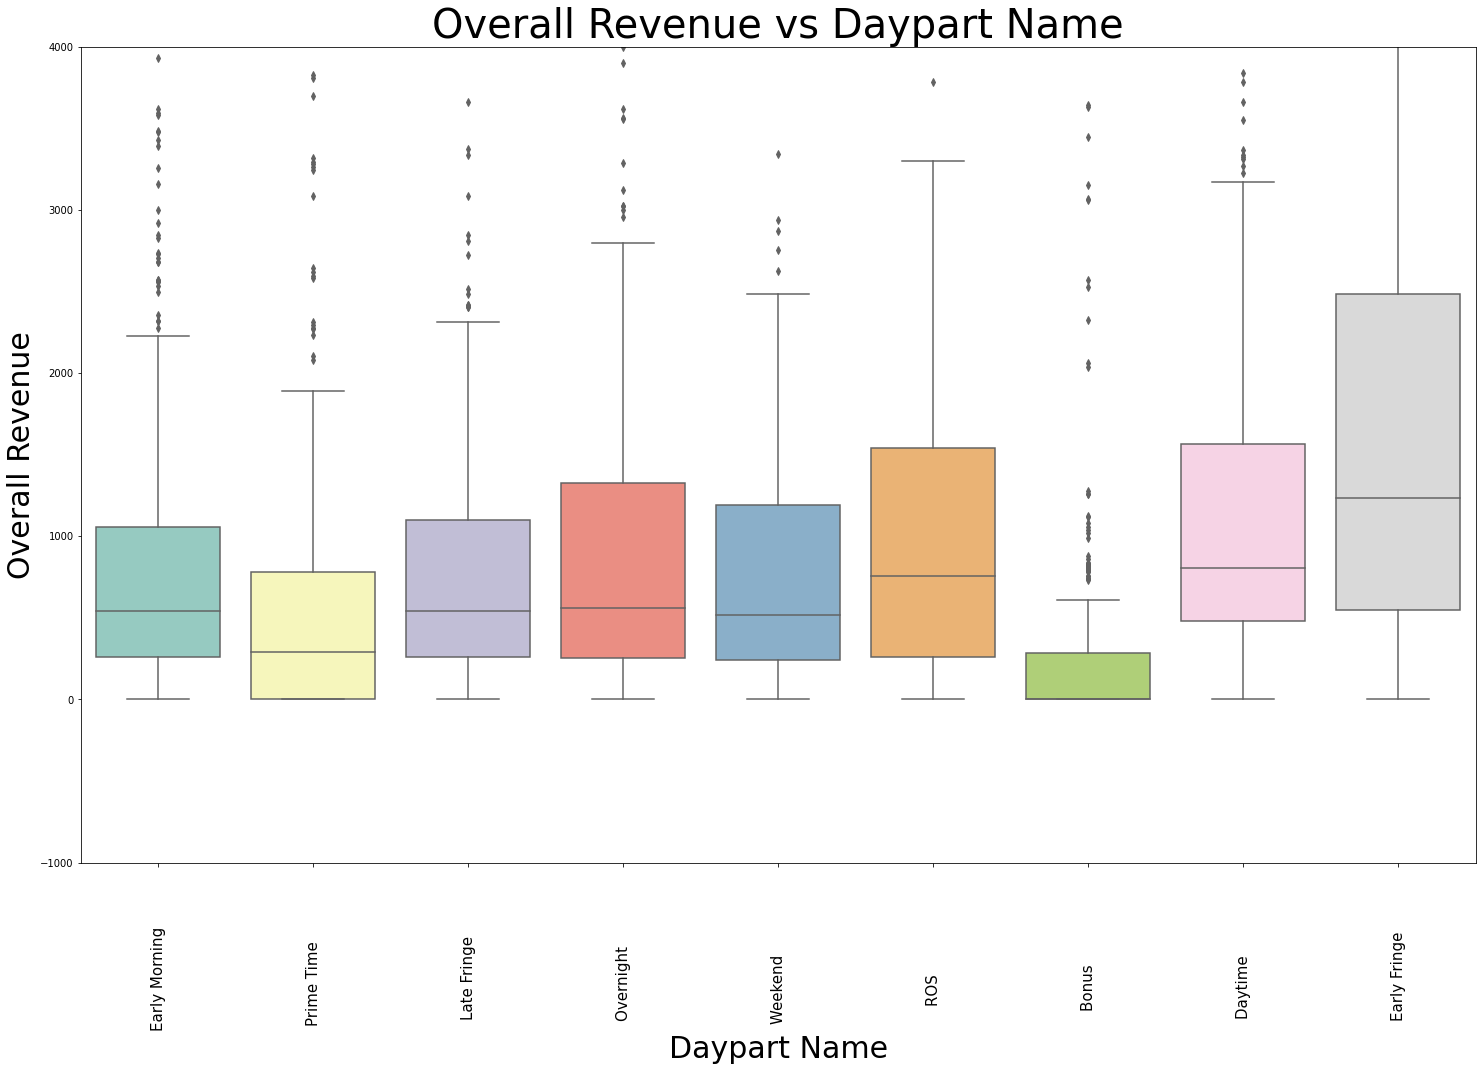




--------------  Rotation  --------------

-----checking the  Rotation  dummy variable --------
                    0     1     2     3     4     5     6     7     8     \
Rotation_F             0     0     0     0     0     0     0     0     0   
Rotation_MTWF          0     0     0     0     0     0     0     0     0   
Rotation_MTWTF         0     0     0     0     0     0     0     0     0   
Rotation_MTWTFSaSu     0     0     0     0     0     0     0     0     0   
Rotation_SaSu          1     1     1     1     1     1     1     1     1   

                    9     ...  3378  3379  3380  3381  3382  3383  3384  3385  \
Rotation_F             0  ...     0     0     0     0     0     0     0     0   
Rotation_MTWF          0  ...     0     0     0     0     0     0     1     1   
Rotation_MTWTF         0  ...     1     1     1     1     1     1     0     0   
Rotation_MTWTFSaSu     0  ...     0     0     0     0     0     0     0     0   
Rotation_SaSu          1  ...     0     

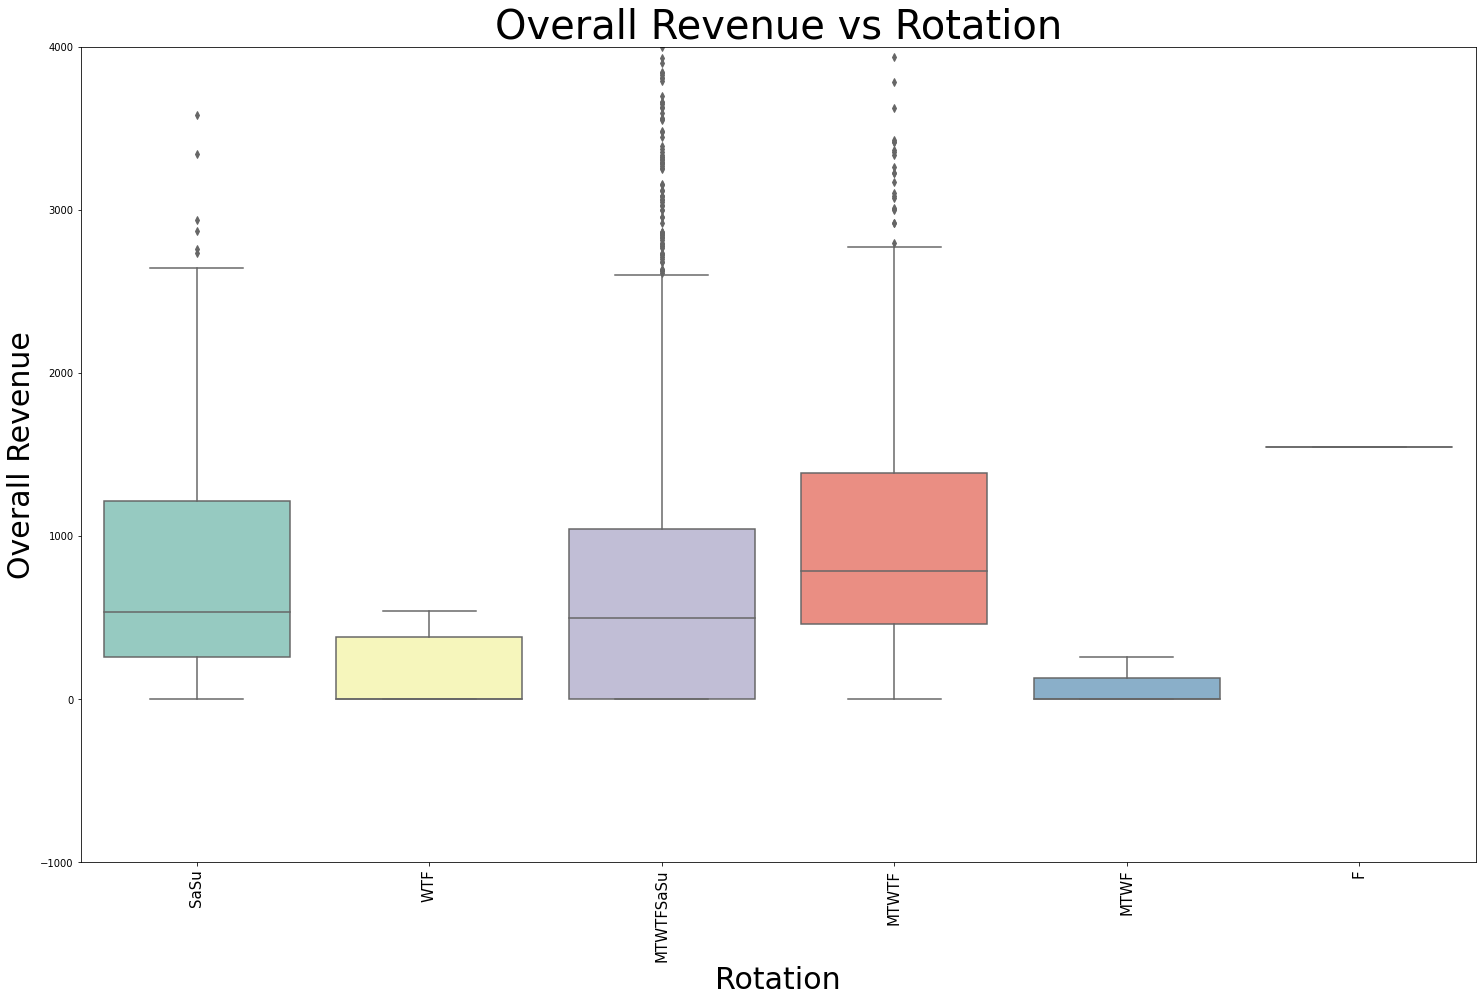




--------------  BC Day  --------------

-----checking the  BC Day  dummy variable --------
                 0     1     2     3     4     5     6     7     8     9     \
BC Day_FRIDAY       0     0     0     0     0     0     0     0     0     0   
BC Day_MONDAY       0     0     0     0     0     0     0     0     0     0   
BC Day_SATURDAY     0     0     0     0     1     0     0     1     0     1   
BC Day_SUNDAY       1     1     1     1     0     1     1     0     1     0   
BC Day_THURSDAY     0     0     0     0     0     0     0     0     0     0   

                 ...  3378  3379  3380  3381  3382  3383  3384  3385  3386  \
BC Day_FRIDAY    ...     0     0     0     0     0     0     0     0     0   
BC Day_MONDAY    ...     0     0     0     0     0     0     1     1     1   
BC Day_SATURDAY  ...     0     0     0     0     0     0     0     0     0   
BC Day_SUNDAY    ...     0     0     0     0     0     0     0     0     0   
BC Day_THURSDAY  ...     1     0     0   

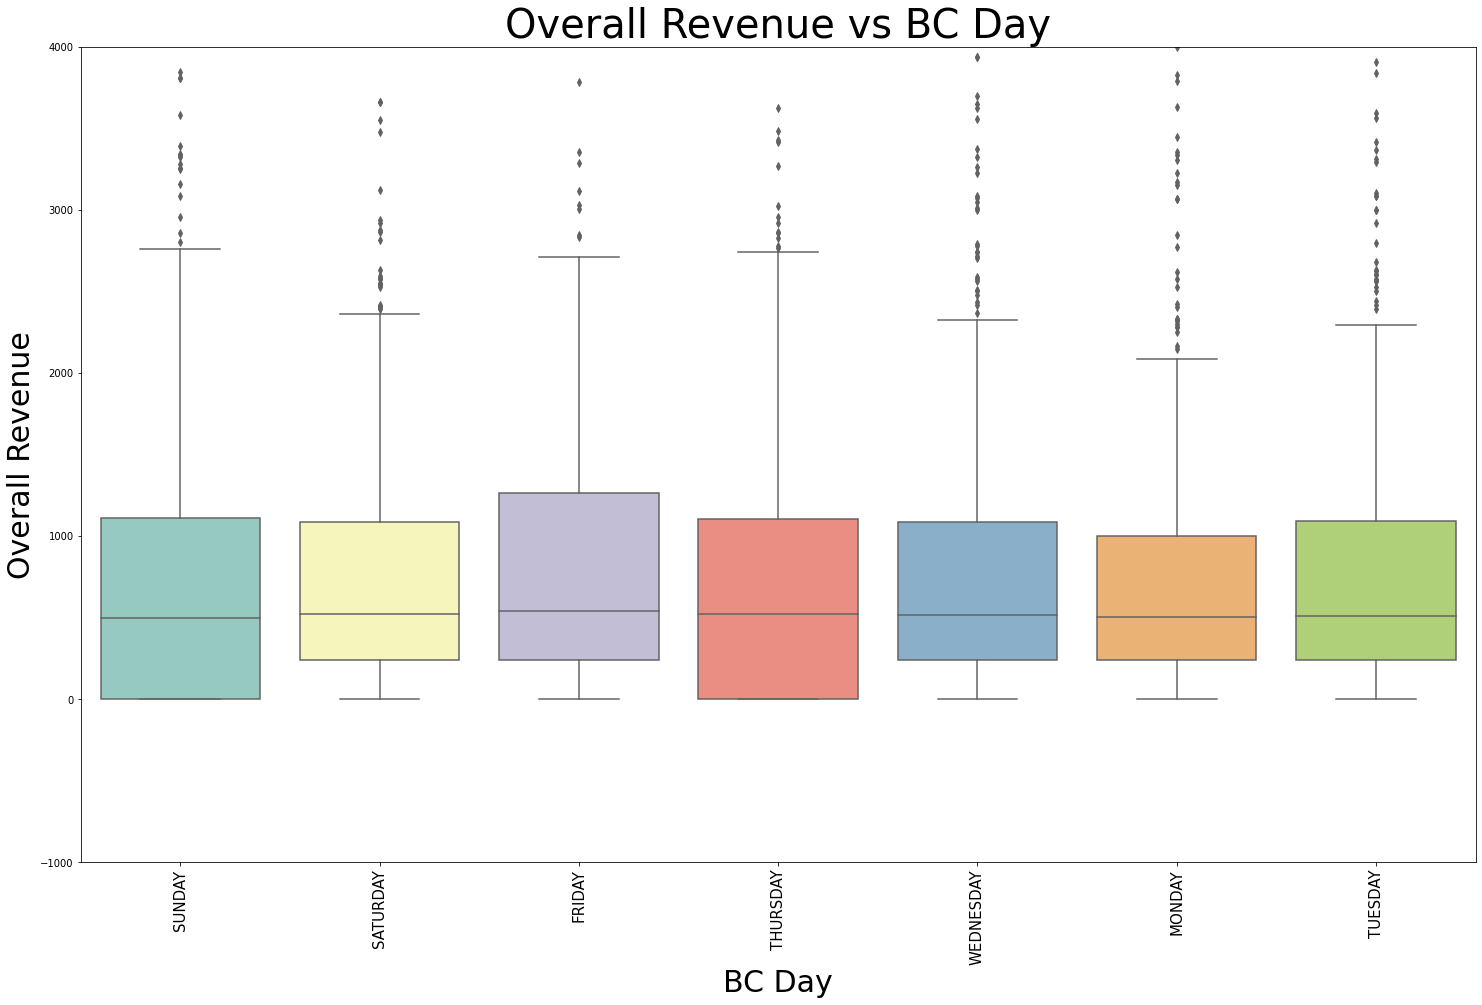

In [39]:
#Loop thru the categorical variables and perform regressions on them.

for var in categorical:
    print("\n\n\n===============================================")
    print("===============================================")
    print("-------------- ", var, " --------------")
    print("===============================================")
    print("===============================================")
    

    #------ categorical variable regression ------
    cat_data_predummy_df =  pd.DataFrame()
    cat_data_predummy_df[var] = df2[var]
    
    #creating the dummy variables
    cat_data_dummy = pd.get_dummies(cat_data_predummy_df)
    
    print("\n-----checking the ", var ," dummy variable --------")
    print(cat_data_dummy.T.head())

    #we need to make one of the levels the reference level by dropping it
    #for the dummy variables to work and so we look for the level
    #with the smallest occurance and drop it

    #dropping the station with smallest occurance (reference level)
    smallest_station = cat_data_dummy.sum().sort_values(ascending=True).iloc[:1].index[0]
    print("\n--- we're going to drop the reference level - ", smallest_station ," from ",var )
    cat_data_dummy = cat_data_dummy.drop(smallest_station,axis=1)
    
    #------the actual categorical regression-----------
    X = cat_data_dummy
    Y = df2[["OverallRevenue"]] #OVERALL_REVENUE
    # to make statsmodels work, you have to add a constant to X
    X = sm.add_constant(X)
    # #running the regression
    model = sm.OLS(Y, X) #note that the x and y are inverted here.
    results = model.fit()
    #print("\n==========Results of the OLS regression on ", var,  "  ===========\n")
    #print(results.summary())

    #perform an F-test to see if the overall model has any significance.
    fvalue = results.fvalue
    dfn_value=results.df_model
    dfd_value=results.df_resid

    #calculating the f-critical (F-Table value) for comparison
    f_critical = scipy.stats.f.ppf(q=1-0.05, dfn=dfn_value, dfd=dfd_value)

    print("\n=================F-Test==========================\n")
    
    if (fvalue > f_critical):   
        print("\nwoohoo !! F-test passed, reject null hypothsis ! let's keep truckin !!!\n")
        Ftest_result = "F-test passed"
    else:
         print("\n!!!!!! F-test failed - DEATH !!!!!!!\m")
         Ftest_result = "F-test failed"

    print("\n===============ANOVA============================\n")

    #a dataframe to hold valid p-values and coefficents.
    coeff_results_station = pd.DataFrame()

    #we find all the p-values that matter
    pvdataframe = pd.DataFrame(results.pvalues)
    pvdataframe = pvdataframe[pvdataframe[0] < 0.05]
    coeff_results_station["pvalue"] =pvdataframe

    #------print important regression results------------ 
    print("\nModel p-value = ",results.f_pvalue)
    print("Model r-squared = ",results.rsquared)
    print("Model std error = ",np.sqrt(results.scale), "\n")
    
  
    #we note the coefficents for the p-values that matter
    pv_dataframe = pd.DataFrame(results.pvalues)
    cf_dataframe = pd.DataFrame(results.params)
    cf_dataframe = cf_dataframe[pv_dataframe[0] < 0.05]
    coeff_results_station["coeffs"] =cf_dataframe
    
    print("-------p-values and coefficents that matter----\n")
    print(coeff_results_station)
    
    #we update the categorical regression results dataframe
    catg_var_reg_results.loc[var] = [Ftest_result, results.f_pvalue,results.rsquared,np.sqrt(results.scale)]

    #-------plot the regression -----------------
    
    plt.figure(figsize = (25,15))
    ax3 = sns.boxplot(x=df2[var], y=df2["OverallRevenue"], data=df2, palette = "Set3")
    strTitle = "Overall Revenue vs " +  var
    ax3.set_title(strTitle ,fontsize = 40)
    ax3.set_xlabel(var,fontsize=30)
    ax3.set_ylabel("Overall Revenue",fontsize=30)
    ax3.set_ylim(-1000, 4000)
    ax3.set_xticklabels(ax3.get_xticklabels(),rotation = 90,fontsize =15)
    plt.show()



let's look at the results of categorical regression stored in the dataframe ***catg_var_reg_results***

In [40]:
print("\n===========================================\n")
print(catg_var_reg_results)



                     F-test   Model p-val  r-squared    std error
Station Name  F-test passed  0.000000e+00   0.445460  1080.184918
Daypart Name  F-test passed  1.034417e-42   0.062417  1400.802329
Rotation      F-test passed  7.116484e-03   0.004690  1442.641503
BC Day        F-test passed  5.038411e-06   0.010190  1438.862876


although all the parameters pass the F-test and have a tiny p-value (ie statistically significant), the R-squareds are small and therefore not relevant, excapt for "Station Name" -  Station Name seems to have some (but not great amount of..) significance

So then if we look at the different stations that have an acceptable p-value, we see the following

|Parameters|p-value|Coefficent|
|---------------------------------|---------------|----------|
|const                            |7.786636e-03  |**1438.150000**|
|Station Name_A&E                 |2.130590e-02  |**1495.290000**|
|Station Name_BET SOUL            |4.103071e-02 |-1155.326190|
|Station Name_Buzzr Network       |3.228096e-02 |-1201.279412|
|Station Name_Comet Local Breaks  |3.289939e-02 |-1241.452800|
|Station Name_Newsmax             |3.601799e-02 |-1145.261264|
|Station Name_SEM                 |4.725652e-02 |-1438.150000|
|Station Name_Tennis              |4.827112e-02 |-1119.139250|
|Station Name_The Cool TV         |1.389541e-02 |-1372.192459|
|Station Name_WEB                 |3.273470e-31 |**6588.451000**|
|Station Name_Z Living            |2.494077e-02 |-1266.703488|

Of all the stations only WEB and A&E seem to have a positive impact on the Overall Revenue. WEB is not relevant as its a place-holder for web orders which leaves only A&E as a station with positive impact with respect to the reference level (CNN). The other stations seem to have negative impact.

Our ***Conclusion*** from Categorical variables is as follows:
1. Visually, A&E and the GAME network, followed by CNN and Hallmark seem to have some impact
2. Mathematically A&E seems to have some impact
3. Visually Early Fringe and Daytime in Dayparts seem to be pretty good performers. Mathmatically, Daypart does not seem significant.
4. Rotation does not appear to have any bearing on Revenue
5. Broadcast-Day does not appear to have any bearing on Revenue

Again, you can see some top-level analytical summary of the results [here](https://sites.google.com/view/sjdataportfolio/data-projects/campaign-analysis-gazelle-glider)

## Continuous Variables
We then look at the continuous variables and run regressions on them one at time and examine the regression parameters.

Spend
0     247
1     285
2     238
3    1188
4     247
Name: Spend, dtype: int64


woohoo !! reject null hypothsis ! let's keep truckin !!!

Model p-value =  5.455605442927194e-39
Model r-squared =  0.04914440439212786
Model std error =  1409.2234951607459 


=====Regression Coefficents  that matter======                     0
const  1.624418e-54
Spend  5.455605e-39


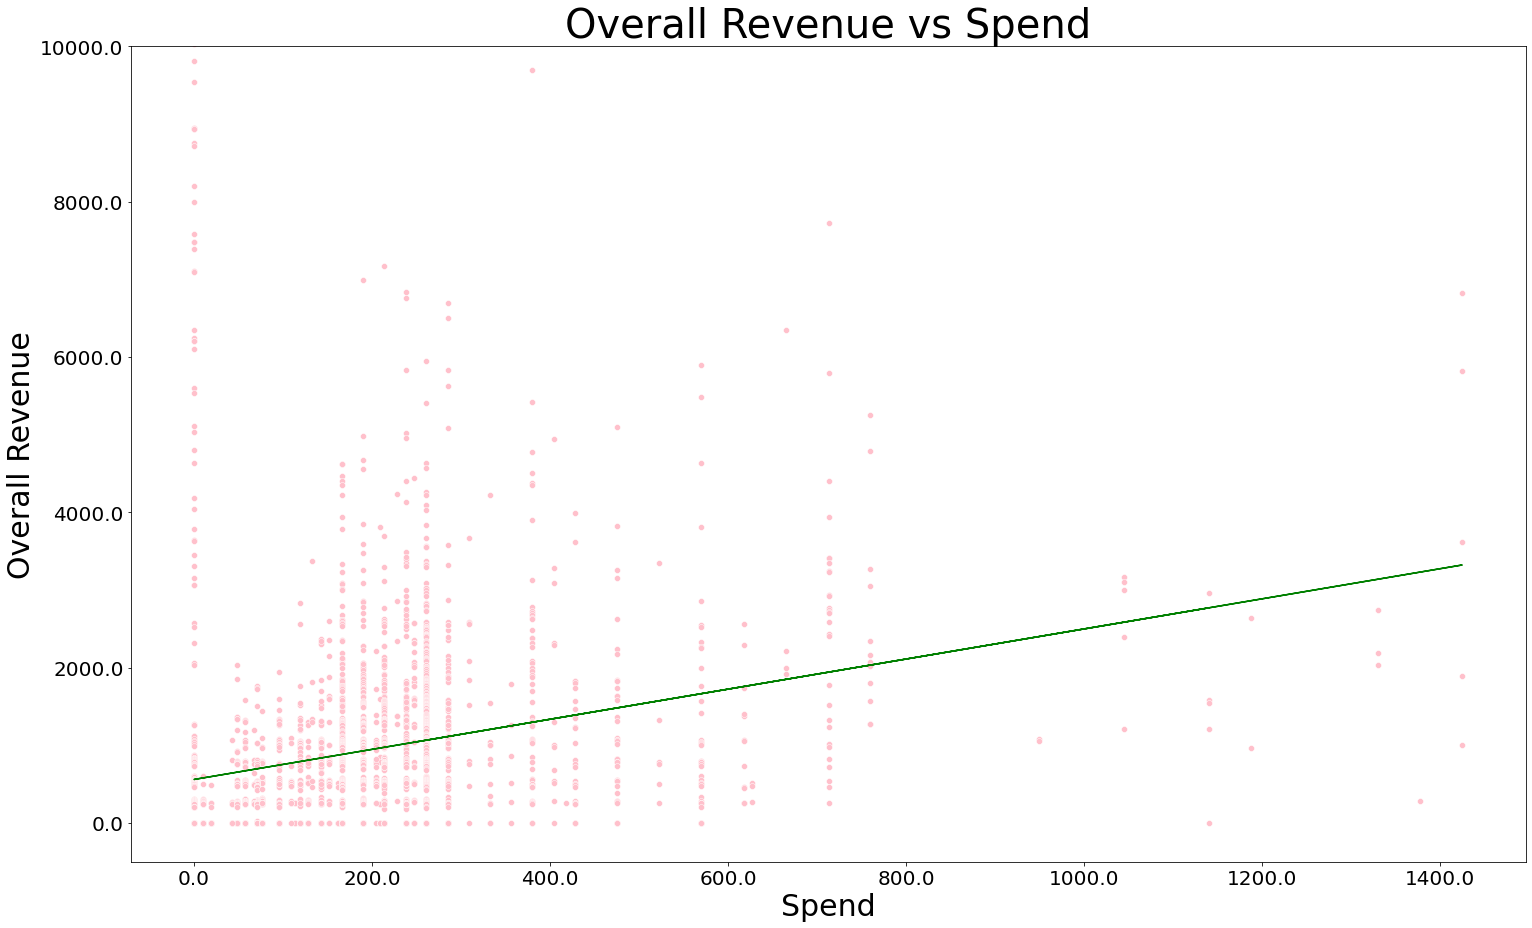

CALL
0    27
1     7
2    14
3    64
4    10
Name: CALL, dtype: int64


woohoo !! reject null hypothsis ! let's keep truckin !!!

Model p-value =  0.0
Model r-squared =  0.5369444753742608
Model std error =  983.4202053178249 


=====Regression Coefficents  that matter======                      0
const  1.044678e-262
CALL    0.000000e+00


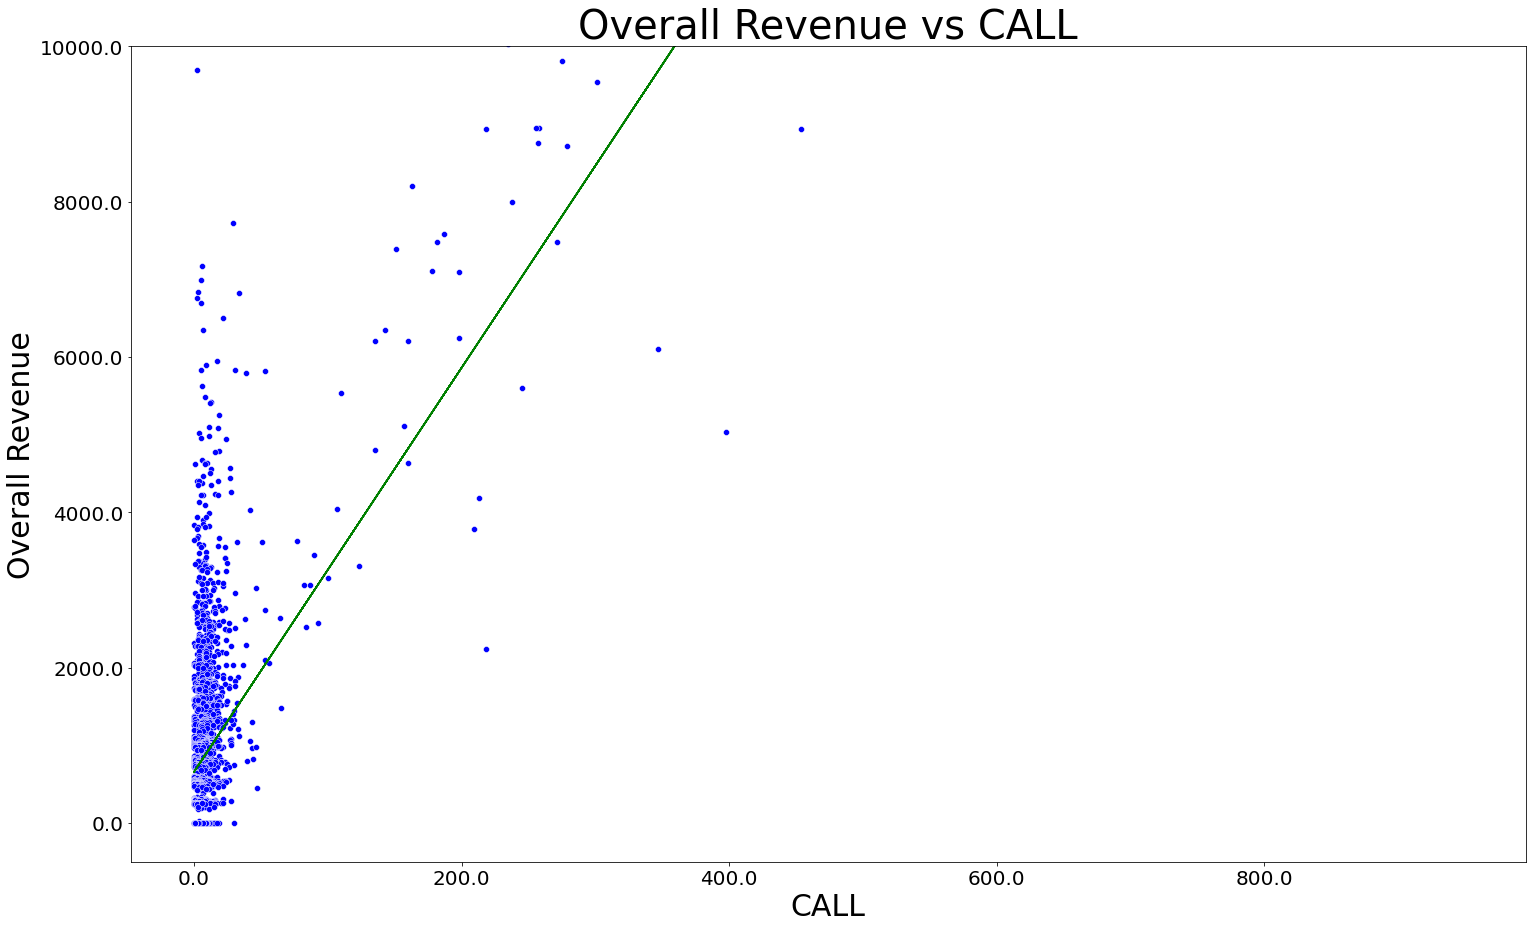

ORDR
0    11
1     2
2     3
3     6
4     3
Name: ORDR, dtype: int64


woohoo !! reject null hypothsis ! let's keep truckin !!!

Model p-value =  0.0
Model r-squared =  0.6178128406506247
Model std error =  893.4302191150292 


=====Regression Coefficents  that matter======                      0
const  1.250033e-258
ORDR    0.000000e+00


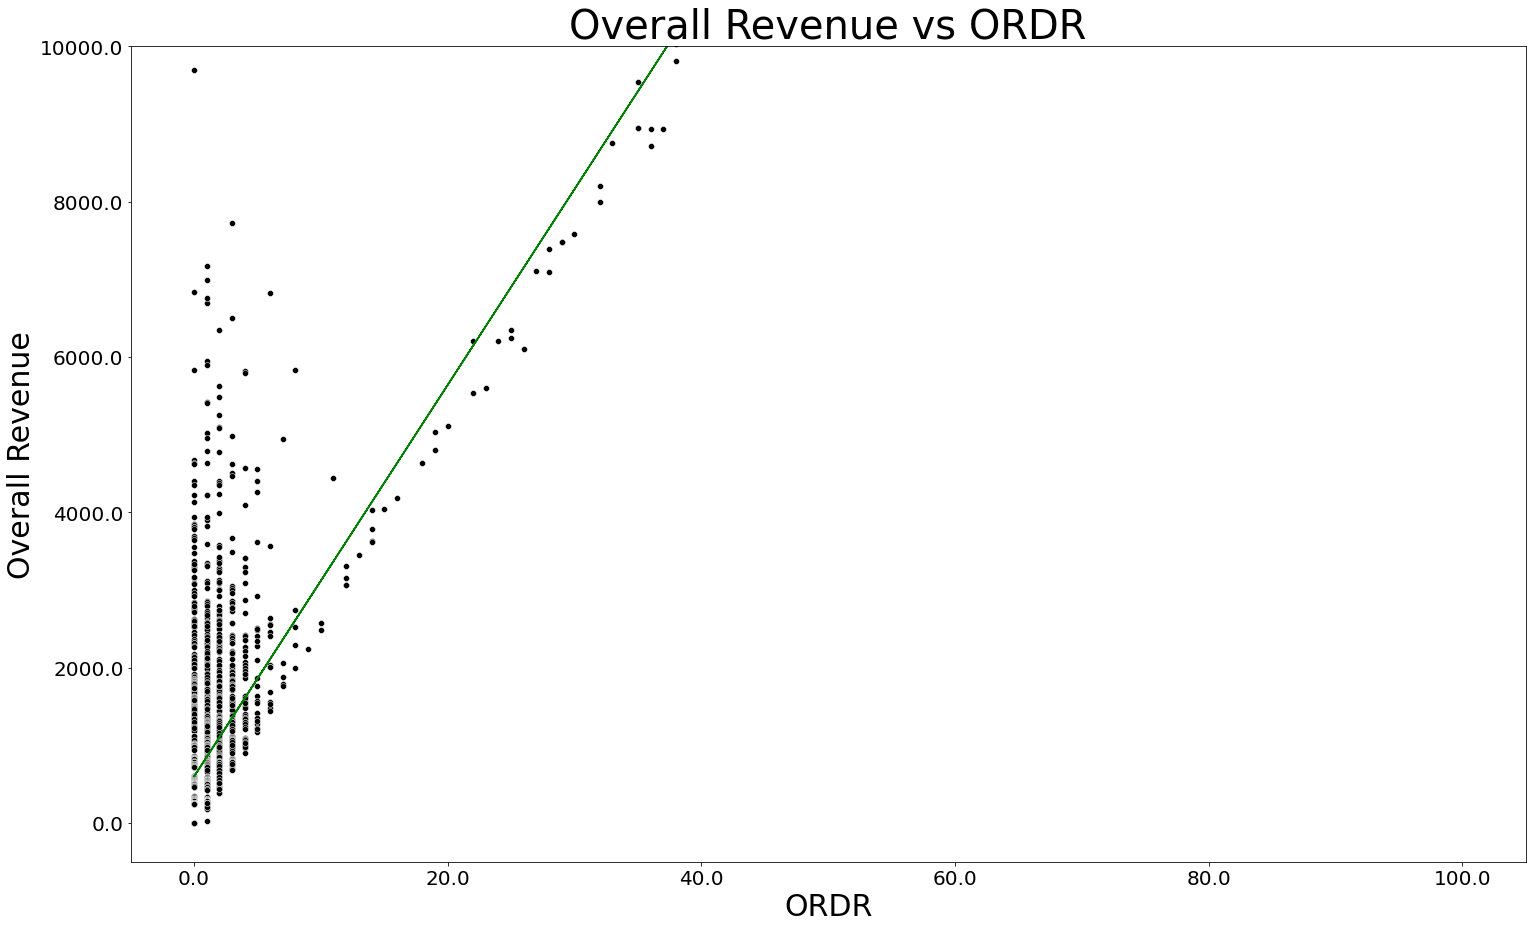

OnlineVisits
0      23
1     387
2    1698
3     418
4     198
Name: OnlineVisits, dtype: int64


woohoo !! reject null hypothsis ! let's keep truckin !!!

Model p-value =  1.8514159602613272e-105
Model r-squared =  0.13108322838997022
Model std error =  1347.1367441240159 


=====Regression Coefficents  that matter======                             0
const         7.092838e-103
OnlineVisits  1.851416e-105


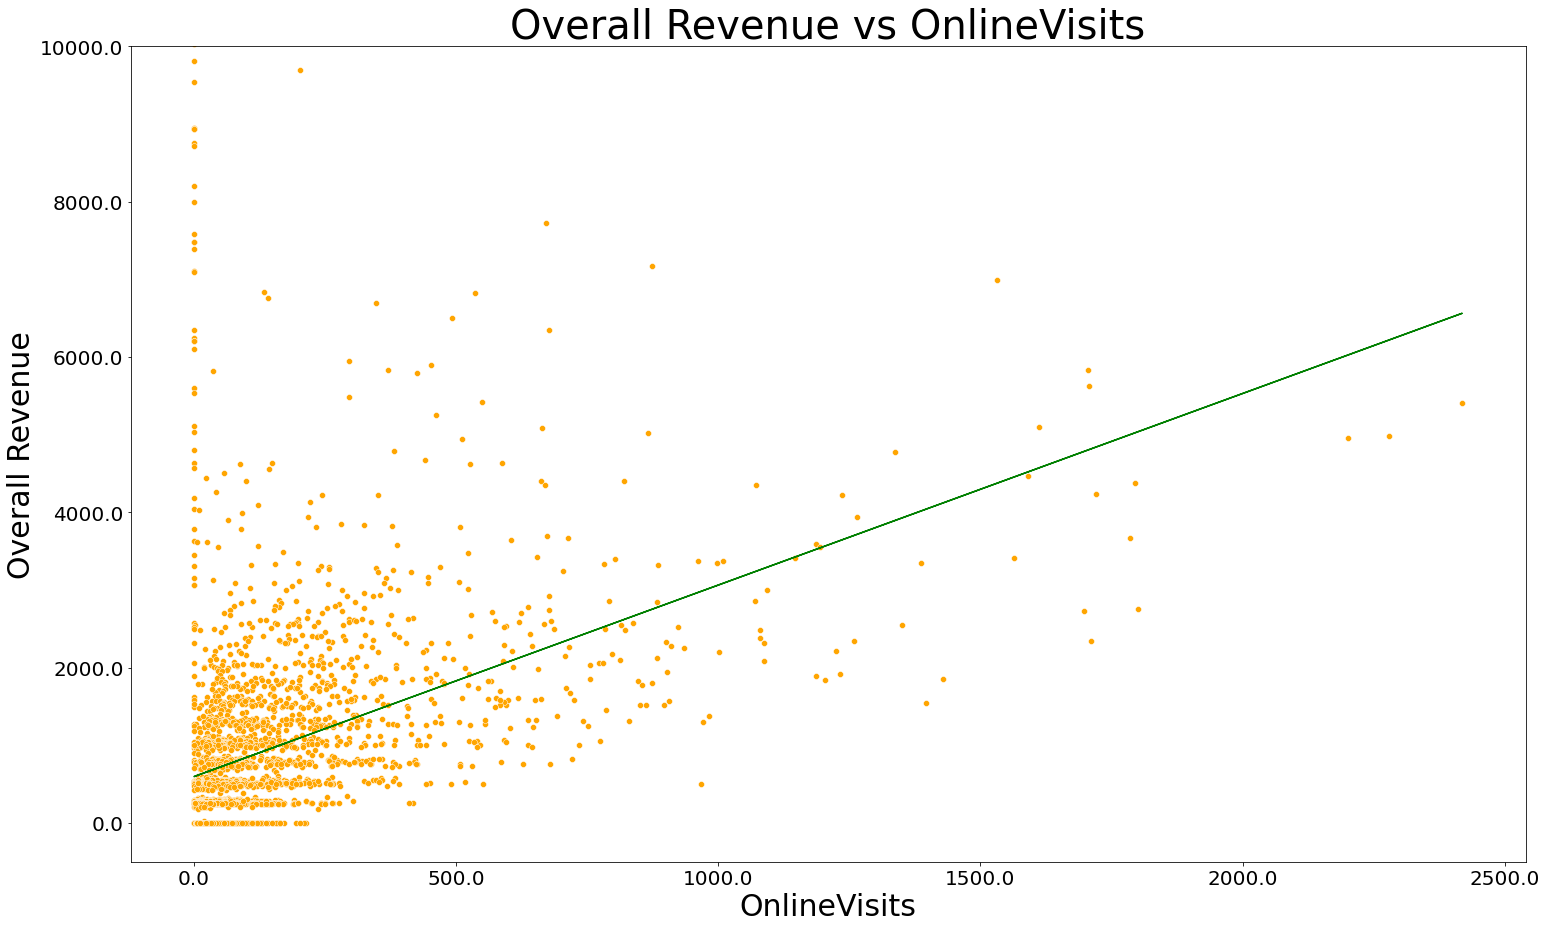

In [41]:
#we loop thru the continuous variables and analyse the results 
for key,value in continuous.items():
    print(value)
    print(df2[value].head())
    
    #-------------- performing the regression ---------------------

    X1 = df2[value]
    Y = df2["OverallRevenue"]
    
    #to make statsmodels work, you have to add a constant to X
    X1 = sm.add_constant(X1)
    
    #running the regression
    model2 = sm.OLS(Y, X1) #note that the x and y are inverted here.
    results2 = model2.fit()
    
    #perform an F-test to see if the overall model has any significance.
    fvalue2 = results2.fvalue
    dfn_value2=results2.df_model
    dfd_value2=results2.df_resid
    
    #calculating the f-critical (F-Table value) for comparison
    f_critical2 = scipy.stats.f.ppf(q=1-0.05, dfn=dfn_value2, dfd=dfd_value2)
    
    if (fvalue2 > f_critical2):   
        print("\n\nwoohoo !! reject null hypothsis ! let's keep truckin !!!")
        Ftest_result = "F-test passed"
    else:
         print("!!!!!! DEATH !!!!!!!")    
         Ftest_result = "F-test failed"
    
    #------print important regression results------------ 
    print("\nModel p-value = ",results2.f_pvalue)
    print("Model r-squared = ",results2.rsquared)
    print("Model std error = ",np.sqrt(results2.scale), "\n")

    #lets' find the p-values that matter
    pvdataframe2 = pd.DataFrame(results2.pvalues)
    pvdataframe2 = pvdataframe2[pvdataframe2[0] < 0.05]
    print("\n=====Regression Coefficents  that matter======  ", pvdataframe2)
    
    #updating the regression results dataframe
    #regression_results.loc[value] = [value,"OverallRevenue",fvalue2,dfn_value2,dfd_value2 ,
    #                                 f_critical2, results2.f_pvalue, results2.rsquared,
    #                                 results2.params[0] ,results2.params[1], results2.pvalues[0]
    #                                 ,results2.pvalues[1], std_error_model]
    
    

    #calculating the value of the predicted line.
    intercept = results2.params[0]
    slope = results2.params[1]
    y_predicted = intercept + (slope * X1)

    conti_var_reg_results.loc[value] = [Ftest_result, results2.f_pvalue, slope,results2.rsquared,np.sqrt(results2.scale)]
    
    #-------------- plotting charts ---------------------
    
    plt.figure(figsize = (25,15))
    ax3 = sns.scatterplot(x=df2[value], y=df2["OverallRevenue"], data=df2, color = key)
    strTitle = "Overall Revenue vs " +  value
    ax3.set_title(strTitle ,fontsize = 40)
    ax3.set_xlabel(value,fontsize=30)
    ax3.set_ylabel("Overall Revenue",fontsize=30)
    ax3.set_ylim(-500, 10000)
    xlabels = ax3.get_xticks().tolist()
    ylabels = ax3.get_yticks().tolist()
    ax3.set_xticklabels(xlabels,fontsize =20)
    ax3.set_yticklabels(ylabels,fontsize =20)
    ax3.plot(X1,y_predicted, color="green",label = "fitted line")
    plt.show()




## Regression results of continuous variables

Finally we look at the results of the regressions to see which variables are best.

In [42]:
print(conti_var_reg_results)

                     F-test    Model p-val  Coefficent  r-squared    std error
Spend         F-test passed   5.455605e-39    1.938217   0.049144  1409.223495
CALL          F-test passed   0.000000e+00   26.016379   0.536944   983.420205
ORDR          F-test passed   0.000000e+00  252.101492   0.617813   893.430219
OnlineVisits  F-test passed  1.851416e-105    2.466411   0.131083  1347.136744


Our ***Conclusion*** from Continuous variables is as follows:

1. Visually, we see a more gradual-slope relationship between Rates (spot cost) and Revenue. Rates between 0 and 400 seem like the sweet spot, anything beyond that doesnt seem to add that much to revenue. Paying more, doesnt seem to help much. Mathematically, the relationship positive but closer to zero
2. Orders received (ORDR) have a direct impact on revenue, we see this both visually and in the regression. Unfortunately this variable is not that significant as we cant do much to increase the number of orders.
3. Visually CALL data seems clustered most densely around 0-15 calls, anything beyond that does not seem to do much for revenue. R-Squared is average, meaning there is a weak relationship between the number of calls received and overall revenue.
4. The Online visits graph shows a gradual slope, with the majority of the data clustered around 0-400 online visits; meaning that there's a less sensitive relationship and that more people showing up online dont necessarily mean more revenue. R-Squared is small, meaning there is a weak/no relationship between the number of online visits and overall revenue.

Again, you can see some top-level analytical summary of the results [here](https://sites.google.com/view/sjdataportfolio/data-projects/campaign-analysis-gazelle-glider)

### Next Steps

*   Multiple Regression using *Forwards Stepwise Variable Selection*
*   Multiple Regression using *Forwards Stepwise Variable Selection* mixing categorical and continuous variables.
*   Lasso Regression to find parameters that have tangiable effects on the target

